# Customer Segmentation using K-Means Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [23]:
df = pd.read_csv(r"D:\documents\Data Analysis With Python\Machine Learning\ML_Project\archive (3)\Mall_Customers.csv")
print("Dataset Loaded Successfully!")
df.head()

Dataset Loaded Successfully!


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
print("Dataset Shape:", df.shape)
print("\nDataset Info:\n")
print(df.info())

Dataset Shape: (200, 5)

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [8]:
print("\nMissing Values:\n")
print(df.isnull().sum())


Missing Values:

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [9]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [24]:
# Encode Gender column if present
if 'Gender' in df.columns:
    df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

print("Data Cleaning Completed!")
df.head()

Data Cleaning Completed!


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


# Exploratory Data Analysis (EDA)

In [11]:
display(df.describe())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.560000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,1.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


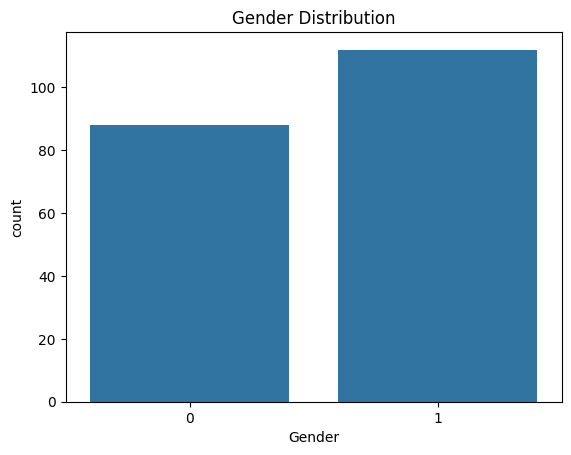

In [12]:
# Gender Distribution
if 'Gender' in df.columns:
    sns.countplot(x='Gender', data=df)
    plt.title("Gender Distribution")
    plt.show()

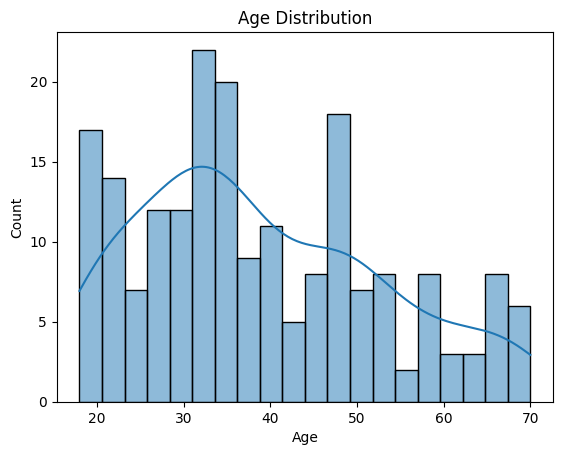

In [13]:
# Age Distribution
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

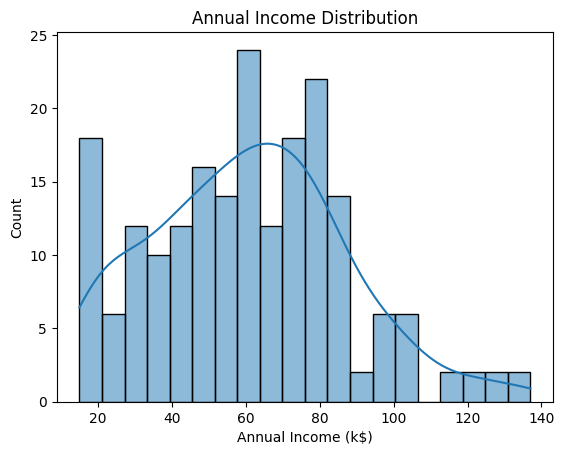

In [14]:
# Annual Income Distribution
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True)
plt.title("Annual Income Distribution")
plt.show()

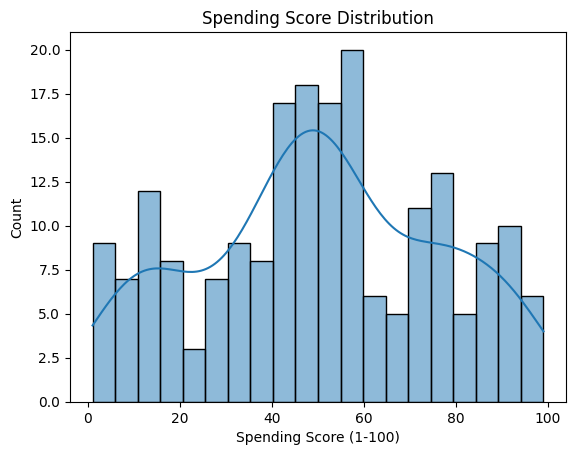

In [15]:
# Spending Score Distribution
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True)
plt.title("Spending Score Distribution")
plt.show()

# Correlation Analysis

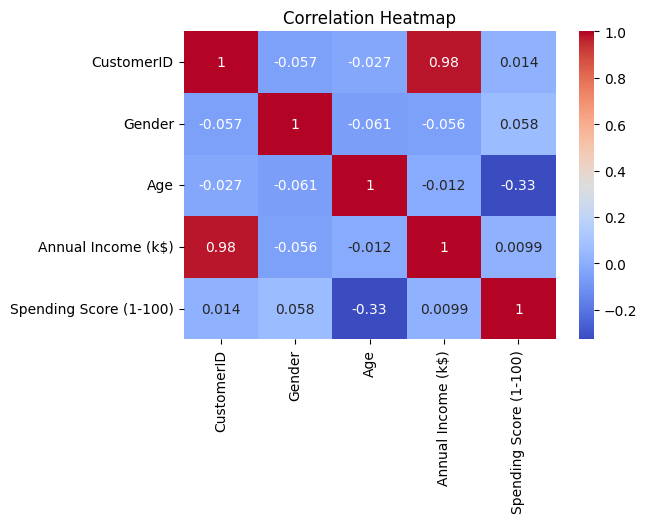

In [16]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [25]:
# Feature Selection 
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Feature Scaling

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

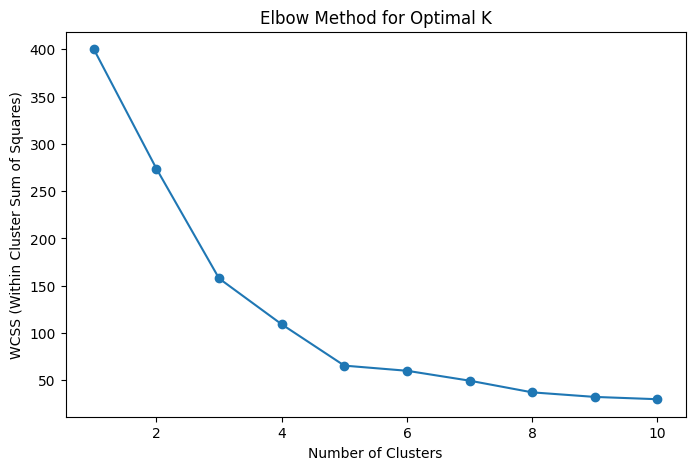

In [19]:
# Finding Optimal Number of Clusters (Elbow Method)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Within Cluster Sum of Squares)")
plt.show()

# Model Training with Optimal K

In [26]:

k = 5  
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

df['Cluster'] = cluster_labels
print("Model Trained Successfully!")
df.head()

Model Trained Successfully!


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,0,19,15,39,4
1,2,0,21,15,81,2
2,3,1,20,16,6,4
3,4,1,23,16,77,2
4,5,1,31,17,40,4


# Model Evaluation

In [21]:
inertia = kmeans.inertia_
silhouette = silhouette_score(X_scaled, cluster_labels)

print(f"Inertia (WCSS): {inertia:.2f}")
print(f"Silhouette Score: {silhouette:.3f}")

Inertia (WCSS): 65.57
Silhouette Score: 0.555


# Visualizing Clusters

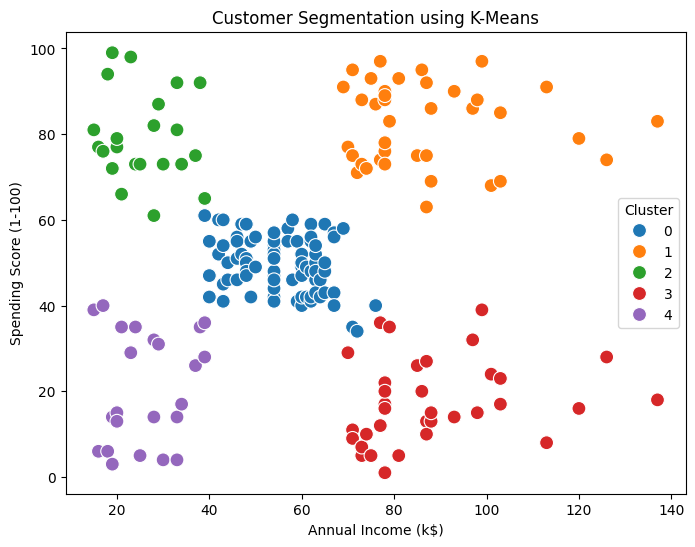

In [22]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X['Annual Income (k$)'], 
    y=X['Spending Score (1-100)'], 
    hue=df['Cluster'], 
    palette='tab10', 
    s=100
)
plt.title("Customer Segmentation using K-Means")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title='Cluster')
plt.show()